In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
from numpy import pi
from sklearn.datasets import make_circles
import time
from IPython.display import clear_output

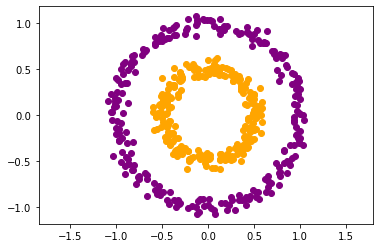

In [2]:
# Crear el dataset de los circulos
 
n = 500 # numero de registros
p = 2   # caracteristicas de los registros de los datos
 
x, y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
 
y = y[:,np.newaxis]
 
plt.scatter(x[y[:,0] == 0,0], x[y[:,0] == 0,1], c = "purple")
plt.scatter(x[y[:,0] == 1 ,0], x[ y[:,0] == 1,1], c = "orange")
plt.axis("equal")
plt.show()

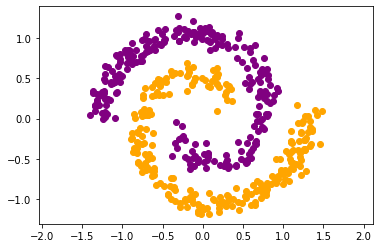

In [3]:
# Crear el dataset de los espirales
 
N = 250
theta = np.sqrt(np.random.rand(N))*2*pi  #np.linspace(0,2*pi,100)
 
r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)
 
r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)
 
res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)
 
res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)
 
np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

spiral_bin = res[:,2,np.newaxis] 
spiral = res[:,:2] / 12

plt.scatter(spiral[ spiral_bin[:, 0 ] == 0 , 0 ], spiral[ spiral_bin[:, 0 ] == 0 , 1 ] , color = "orange")
plt.scatter(spiral[ spiral_bin[:, 0 ] == 1 , 0 ], spiral[ spiral_bin[:, 0 ] == 1 , 1 ] , color = "purple")

plt.axis("equal")
plt.show()
 


In [4]:
## Clase para cada capa de la red 
 
class neural_layer():
  def __init__(self, n_conn, n_neuronas, activacion):
    self.activacion = activacion
    self.b = (np.random.rand(1,n_neuronas) * 2) - 1
    self.w = (np.random.rand(n_conn , n_neuronas) * 2) - 1

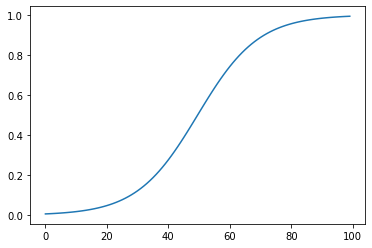

In [5]:
# funciones de activacion 
 
sigm = (lambda x: 1/ (1 + np.e ** (-x)), lambda x: x * (1-x))
relu = lambda x: np.maximum(0,x)
 
 
_x = np.linspace(-5, 5, 100)
plt.plot(sigm[0](_x))

In [6]:
#funcion para crear la red neuronal entera  
def create_neural_network(topology, activacion):
  neural_network = []
  for l, layer in enumerate(topology[:-1]):
    neural_network.append(neural_layer(topology[l],topology[l+1], activacion))
  return neural_network

In [7]:
# funcion de coste
f_cost = (lambda yp, yr: np.mean((yp - yr) ** 2  ), lambda yp,yr: (yp-yr)) 

#funcion de entrenamiento 
def train(neural_net, x, y, f_cost, lr = 0.5, train = True):
  # paso hacia adelante
  outs = [(None,x)]

  for l, layer in enumerate(neural_net):
    z = outs[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].activacion[0](z)
 
    outs.append((z,a)) 
    #print(f_cost[0](outs[-1][1], y)) 
  
  if train:
    # backpropagation

    delta = []
    for l in reversed(range(0,len(neural_net))):
      
      a = outs[l+1][1]
      z = outs[l+1][0]
 
      if l == len(neural_net)-1:
        # calcular delta de la ultima capa
        delta.insert(0,f_cost[1](a, y) * neural_net[l].activacion[1](a))

      else: 
        # calcular delta respecto a la capa previa
        delta.insert(0, delta[0] @ tmp_w.T * neural_net[l].activacion[1](a))
  
      tmp_w = neural_net[l].w
 
      #decenso del gradiente
      neural_net[l].b = neural_net[l].b - np.mean(delta[0], axis = 0, keepdims = True) * lr
      neural_net[l].w = neural_net[l].w - outs[l][1].T @ delta[0] * lr
 
  return outs[-1][1]
 
#train(neural_net,x,y,f_cost,0.5)

In [8]:
def training(topologia, iteraciones, entrada, salida, activacion,f_cost,learning_rate):

  neural_net = create_neural_network(topologia, activacion)
  loss = []
 
  for i in range(iteraciones):
 
    #pY = train(neural_net,x,y,f_cost, lr= 0.02)              # dataset circulos
    pY = train(neural_net,entrada,salida,f_cost, lr= learning_rate)  # dataset espirales
    if i % 25 == 0:

      loss.append(f_cost[0](pY,salida)) 
 
      res = 100
 
      _x0 = np.linspace(-1.5,1.5, res)
      _x1 = np.linspace(-1.5,1.5, res)
 
      _y = np.zeros((res,res))
 
      for i0, x0 in enumerate(_x0):
        for i1, x1 in enumerate(_x1):
          _y[i0, i1] = train(neural_net, np.array([[x0, x1]]), y , f_cost, train = False)[0][0]
        
    print(i)
    clear_output(wait = True)
        
  plt.pcolormesh(_x1,_x0 , _y, cmap="coolwarm")
  plt.axis("equal")
  plt.scatter( entrada[ salida[:, 0 ] == 0 , 1 ] ,entrada[ salida[:, 0 ] == 0 , 0 ], color = "orange")
  plt.scatter(entrada[ salida[:, 0 ] == 1 , 1 ] , entrada[ salida[:, 0 ] == 1 , 0 ], color = "purple")
  
  plt.show()
  plt.plot(range(len(loss)), loss)
  plt.show()
  print(loss[-1])

 

<ipython-input-8-23755cf44c0b>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(_x1,_x0 , _y, cmap="coolwarm")


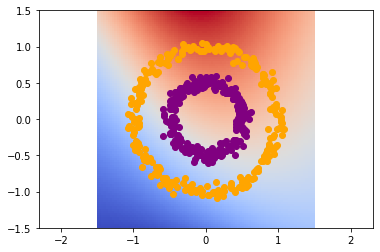

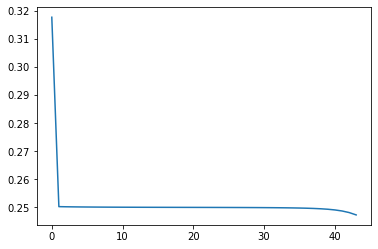

0.24731918757818733


In [10]:
training([p, 4 , 8, 1],1500, x, y,sigm, f_cost,0.02)

<ipython-input-8-23755cf44c0b>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(_x1,_x0 , _y, cmap="coolwarm")


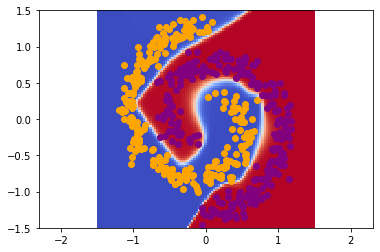

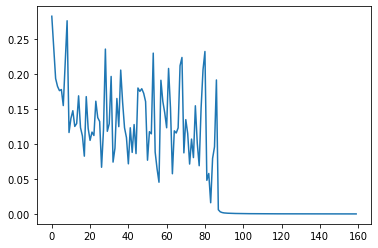

0.0001119169472040609


In [10]:
training([p, 6, 8 ,10, 12],4000, spiral, spiral_bin,sigm, f_cost,0.02)